# Declaration of Originality

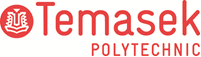

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Ang Wang Xing (2402242H)
* Tutorial Group                : PC06 
* Tutor						    : Emile Sabastian 
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [3]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

The necessary Python libraries are imported for data manipulation,
visualisation, and analysis.

# 1. Business Understanding
Goal: Customer churn leads to revenue loss and increased customer acquisition costs.
This project aims to predict whether a customer will churn based on their
demographic, account, and service usage information using supervised
machine learning.

# 2. Data Understanding

## 2.1 Load dataset

In [4]:
## Read *.csv file into pandas DataFrame
FILE_PATH= "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 2.2 Summary Statistics

In [5]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
## Check for missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset contains 7,043 rows and 21 columns. Each row represents a customer, and the columns include demographic,service subscription, and billing information.

There are no missing values present in the dataset. However, there are some columns such as Contract are stored as object types and will need data preprocessing before modelling.

In [7]:
## Describe data distribution
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


This provides an overview of both numerical and categorical features in the dataset. 

Numerical features:
The 'tenure' column ranges from short-term customers to long-term customers, indicating a wide spread of customer loyalty. The 'MonthlyCharges' show variability in customer billing amounts, indicating different service plans. The 'TotalCharges' shows the total amount a customer spent, which may correlate with tenure.

Categorical features:
Many columns, such as gender, 'Partner', and 'Dependents', have two dominant categories, indicating binary characteristics. Service-related features such as 'InternetService' and 'Contract' show multiple categories, which will require encoding before model training. The target variable Churn contains both "Yes" and "No" classes, confirming this is a binary classification problem.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

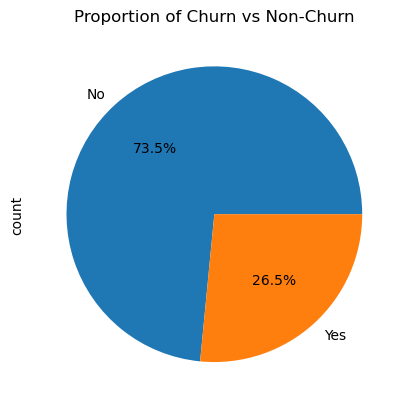

In [8]:
## Understanding distribution of target
col_y = "Churn"

## Plot pie chart for target variable
df[col_y].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Proportion of Churn vs Non-Churn")
plt.show()


The pie chart shows the proportion of customers who churn versus those who remain. While churned customers form a minority, the proportion is significant enough to justify predictive modelling.

In [9]:
## Tally counts for target variable
df[col_y].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

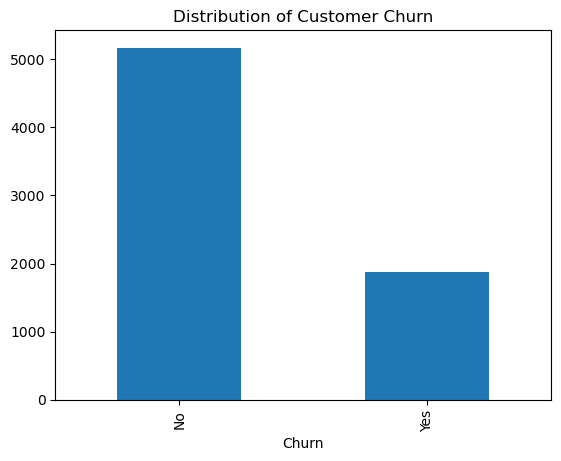

In [10]:
## Plot bar chart for target variable
df[col_y].value_counts().plot(kind="bar")
plt.title("Distribution of Customer Churn")
plt.show()

The bar chart shows that the majority of the customers, of about 5174 did not churn, while a smaller proportion of about 1869 customers churned.

This means that a moderate class imbalance exists in the target variable. As a result, relying solely on accuracy may be misleading, and additional evaluation metrics such as F1-score can be considered during model evaluation.

### 2.3.1.2 Understanding distribution of features

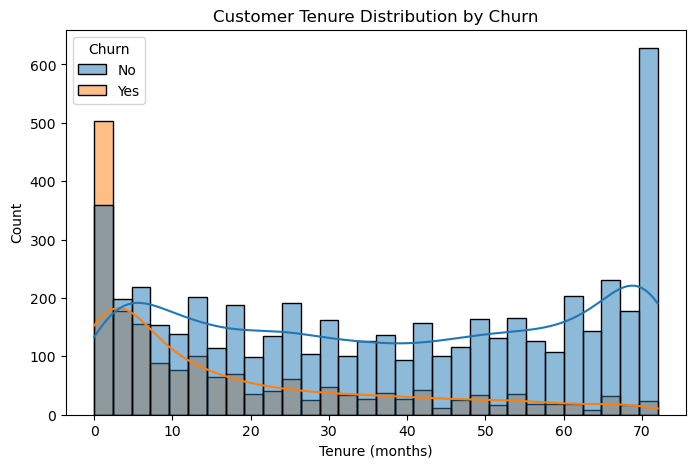

In [11]:
## Understanding distribution of features
## Plot histogram Tenure vs Churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True)
plt.title("Customer Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

From the histogram, it can be seen that customers with shorter tenure are more likely to churn, compared to long-term customers, which tend to remain with the service. This suggests that tenure is a strong predictor of churn and should be kept in the model.

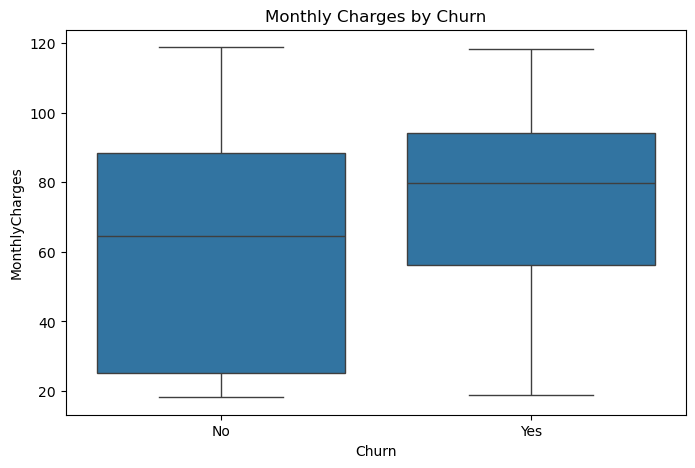

In [12]:
## Plot boxplots for Monthly Charges vs Churn (numeric)
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn")
plt.show()

From the boxplot, churned customers generally have a higher monthly charges compared to non-churned customers. This suggests that pricing may affect customer churn behaviour.

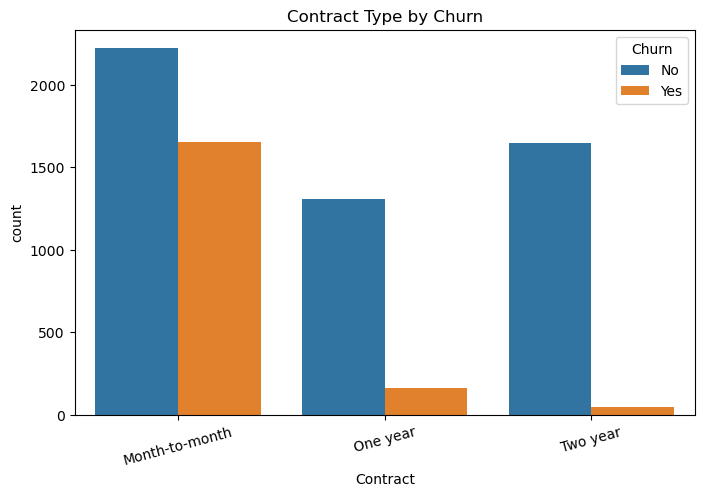

In [13]:
## Plot grouped bar chart for Contract Type vs Churn (categorical)
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type by Churn")
plt.xticks(rotation=15)
plt.show()

The grouped bar chart shows that customers on month-to-month contracts have a higher churn rate compared to customers on one-year or two-year contracts. This suggests that a longer contact appears to improve customer retention.

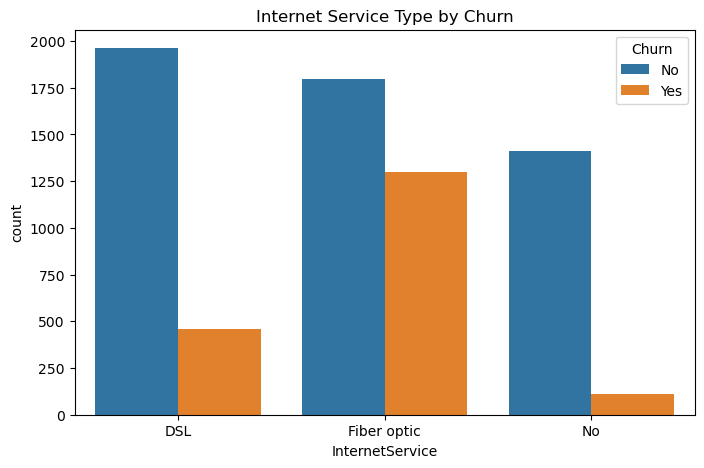

In [14]:
## Plot grouped bar chart for Internet Service vs Churn (categorical)
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service Type by Churn")
plt.show()

Customers with fibre optic internet services show a higher churn rate compared to other service types. This suggests that churn rates may be related to higher costs or service expectations.

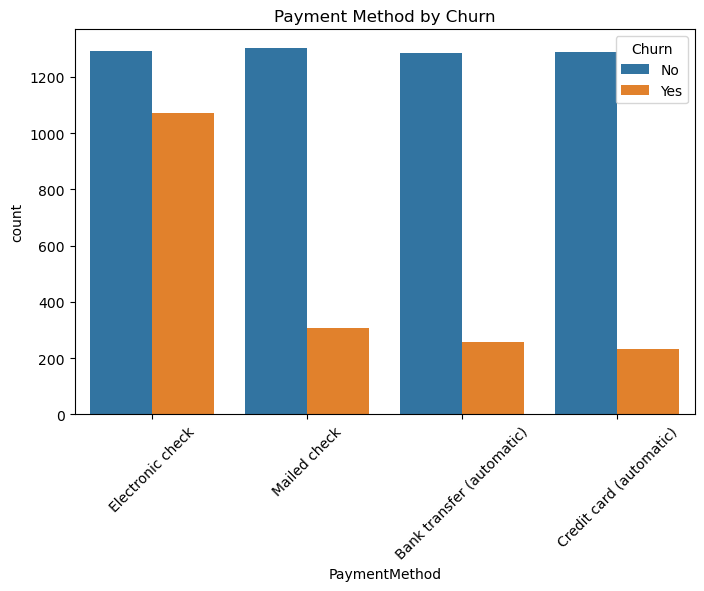

In [15]:
## Plot grouped bar chart for Payment method vs Churn (categorical)
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Payment Method by Churn")
plt.xticks(rotation=45)
plt.show()

Customers using electronic check has the highest churn rates compared to the other payment methods. This suggests churn may be affected by payment convenience or billing experience.

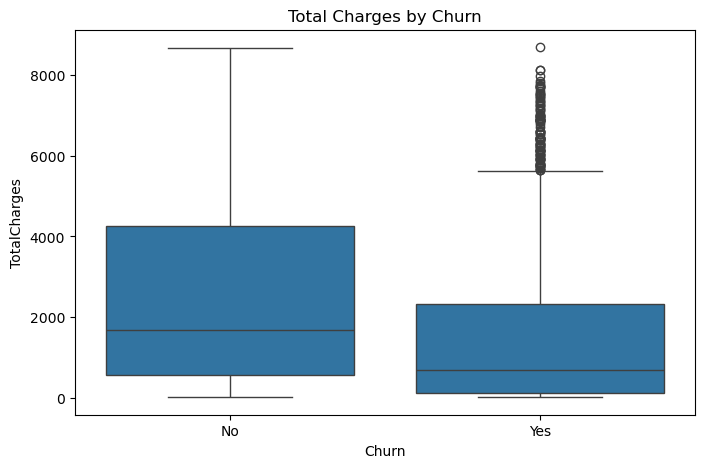

In [16]:
## Plot boxplots for Total Charges vs Churn (numeric)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") ## Convert to numeric
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges by Churn")
plt.show()


The boxplot shows that customers who churn have a lower total charges compared to those who don't. This is expected as churned customers typically have shorter tenures. 
Most of the churned customers have lower total charges due to shorter tenure; there are several extreme outliers in the churned group with very high total charges.

Outliers reflect high-value customers and should be retained. These outliers likely represent long-term customers who churned after accumulating considerable charges over time. They might choose to churn, due to price changes, or better alternatives.

This suggests that even though tenure is a strong factor, high-value customers can still churn. This emphasises the importance of using multiple features together rather than relying on a single predictor.

In [17]:
df[df["Churn"] == "Yes"].sort_values("TotalCharges", ascending=False).head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
1306,0201-OAMXR,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60,Yes
3890,3886-CERTZ,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes
6537,1444-VVSGW,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes
5581,5271-YNWVR,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.15,7856.00,Yes


This shows that a small number of churned customers have high total charges, confirming the presence of high-value churn cases.

#### Summary for distribution of features
From the exploratory analysis of the features:
- Tenure shows a strong relationship with churn.
- MonthlyCharges and TotalCharges indicate pricing and spending patterns
  that influence churn.
- Contract type and payment method significantly affect customer retention.
- Service-related features may contribute to customer expectations and
  satisfaction.

These insights will guide feature selection and model development in the next phase.


### 2.3.2 Understanding relationship between variables

In [18]:
## Check datatypes for each column
col_numeric = df.select_dtypes(include=['float', 'int']).columns ## Select all, ignore string columns

## Display correlation matric (how related 2 variables are)
df_corr = df[col_numeric].corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

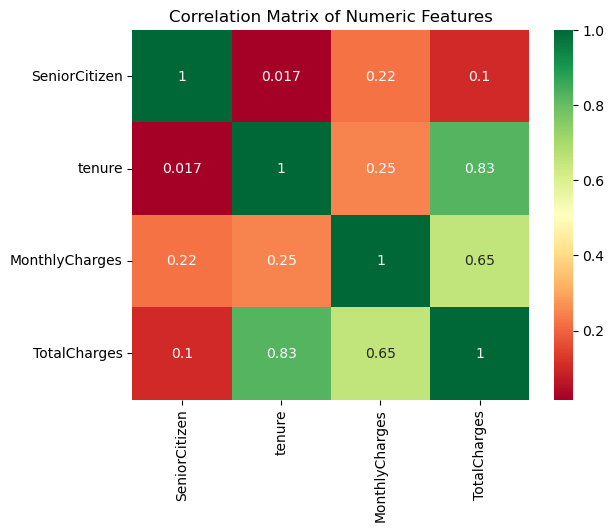

In [19]:
## Plot heatmap
sns.heatmap(df_corr, annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix of Numeric Features")
plt.show

The correlation heatmap shows a strong positive correlation between tenure and TotalCharges. This is expected as customers with longer tenure accumulate higher total charges over time. This also suggests potential feature redundacy.

There is a weaker correlation between MonthlyCharges and tenure, suggesting that pricing varies independently of how long a customer stays with the company.


# 3. Data Preparation

## 3.1 Data Cleaning

In [20]:
## Clean data
## Drop column
df_clean = df.copy()
df_clean.drop(columns=["customerID"], inplace=True)
df_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


The customerID column was removed as it is a unique identifier and does not
contribute predictive value to the churn prediction task.

In [21]:
df_clean["TotalCharges"] = pd.to_numeric(
    df_clean["TotalCharges"], errors="coerce"
)
df_clean["TotalCharges"].isnull().sum()

np.int64(11)

Although initial checks showed no missing values, the TotalCharges column contained blank string values rather than true NaN values.

When TotalCharges was converted to a numeric format, these blank entries were correctly identified as missing values. This highlights the importance of data type inspection during data cleaning.


In [22]:
df_clean["TotalCharges"].fillna(0, inplace=True)
df_clean.isnull().sum()

C:\Users\angwa\AppData\Local\Temp\ipykernel_33632\131152383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["TotalCharges"].fillna(0, inplace=True)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The missing values in TotalCharges matches to the new customers with zero tenure. These values were filled with 0 to show the absence of accumulated charges rather than removing valid customer records. After cleaning, the dataset contains no missing values.

### Data Cleaning Summary

The data cleaning process involved:
- Removing non-informative identifier columns
- Converting TotalCharges to a numeric format
- Handling missing values based on domain understanding

These steps ensure the dataset is suitable for machine learning while
preserving meaningful customer information.


## 3.2 Handling Categorical Data (One-Hot Encoding)

In [23]:
# Define target column
col_y = "Churn"

# Separate features and target
y = df_clean[col_y]
X = df_clean.drop(col_y, axis=1)

# Encode target variable
y = y.map({"Yes": 1, "No": 0})

# One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True) 
X = X.astype(int) ## Ensure all features are of type int

X


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84,1990,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103,7362,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29,346,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74,306,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


The target variable and feature set were separated to prepare for supervised learning. Categorical features were converted into numerical form using one-hot encoding. The drop_first was applied to reduce redundant information, which is beneficial for linear models.

## 3.2 Train-Test Split

In [24]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3
random_state = 2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

The dataset was split into training and testing sets using a 70–30 split. Stratification was applied to preserve the original churn class distribution in both sets, ensuring a fair and reliable model evaluation.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature scaling was applied using StandardScaler to standardise feature magnitudes, which is required for distance-based and linear models.

# 4. Modelling

### 4.2 Train Model

In [26]:
## Initialise and train base model - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train_scaled, y_train) ## Train model

y_pred_logr = logr.predict(X_test_scaled)

accuracy_logr = accuracy_score(y_test, y_pred_logr)
accuracy_logr

0.8012304779933743

Logistic Regression was chosen as the baseline model due to its simplicity and interpretability. Feature scaling was also applied to ensure all features contribute proportionally to the model, as Logistic Regression is sensitive to feature magnitudes.

### Baseline Model Evaluation
Accuracy was selected as the main evaluation metric for the baseline model since both churn and non-churn predictions are important for the business context.
The baseline Logistic Regression model achieved an accuracy of approximately 0.80. This provides a reference point for further model improvement. Its performance will be compared against more complex models to determine whether additional complexity leads to meaningful improvements.


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Train Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_logr = logr.predict(X_test_scaled)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

# Save model
joblib.dump(rf, "churn_model.pkl")

0.7941315664931378


['churn_model.pkl']

### Random Forest Evaluation
A Random Forest classifier was trained to capture potential non-linear relationships between features and customer churn.
Compared to Logistic Regression, Random Forest does not need feature scaling and is robust to outliers, hence making it suitable for this dataset.

The baseline Random Forest model uses default hyperparameter, which may not be optimal for capturing the underlying patterns in the churn dataset. Hyperparameter tuning therefore, has to be applied to systematically improve model performance while controlling model complexity.

### Random Forest (hyperparameter tuning)

In [28]:
## Define parameter distribution
param_dist_rf = {
    'n_estimators': [100, 200, 300],        ## Number of trees in the forest: max 3 values
    'criterion': ['gini', 'entropy'],       ## Measure quality of a split (2 values)
    'max_depth': [None, 10, 20],             ## Maximum depth of tree: explicit values
    'min_samples_split': [2, 5, 10],         ## Minimum number of samples required to split a node: explicit values
    'max_features': ['sqrt', 'log2']         ## Number of features to consider at each split (2 values)
}

from sklearn.model_selection import RandomizedSearchCV

rs_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    cv=5,                      ## Number of cross-validation folds
    scoring='accuracy',        ## Scoring metric
    n_iter=5,                  ## Number of parameter settings sampled
    random_state=42,
    n_jobs=-1                  ## -1: Use all available cores
)

rs_rf.fit(X_train, y_train)

## Obtain best parameters and best estimator
best_rs_params = rs_rf.best_params_
best_rs_rf = rs_rf.best_estimator_

print("Best Parameters:", best_rs_params)
print("Best Estimator:", best_rs_rf)

## Evaluate model
y_pred_rs_rf = best_rs_rf.predict(X_test)
print("Tuned Random Forest accuracy:", accuracy_score(y_test, y_pred_rs_rf))

# Save model
import joblib
joblib.dump(best_rs_rf, "churn_best_rf_model.pkl")   ## Save model


Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=300, random_state=42)
Tuned Random Forest accuracy: 0.8007572172266919


['churn_best_rf_model.pkl']

### Random Forest Hyperparameter Tuning Evaluation
Hyperparameter tuning was performed using RandomisedSearchCV with a restricted and controlled search space to follow the project scope.

Key hyperparameters such as the number of trees, maximum depth, and minimum samples per split were tuned to balance model complexity and generalisation.

The best parameters identified by RandomizedSearchCV includes 300 trees with a maximum depth of 10 and a minimum of 5 samples required to split a node. This helps to reduce overfitting by preventing overly complex trees.

By limiting tree depth, it helps reduce overfitting. While increasing the minimum samples per split encourages more general decision rules. The use of the entropy criterion allows the model to better capture uncertainty in churn behaviour, while the square root feature selection strategy increases diversity across trees. By increasing the number of trees to 300 improves model stability and reduces variance.

The tuned Random Forest achieved an accuracy of 0.80. This shows a slight but consistent improvement over the baseline Random Forest model.

# 5. Model Evaluation/Comparison

### Logistic Regression (base model) vs. Random Forests

In [29]:
## Evaluate Logistic Regression model
y_pred_logr = logr.predict(X_test_scaled)
accuracy_logr = accuracy_score(y_test, y_pred_logr)

print("Logistic Regression Accuracy:", accuracy_logr)

# Evaluate Random Forest model
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)

Logistic Regression Accuracy: 0.8012304779933743
Random Forest Accuracy: 0.7941315664931378


## Model Comparison
The Logistic Regression model achieved an accuracy of 0.80, while the Random Forest model achieved an accuracy of 0.79 on the test. 
Although Random Forest is a more complex model, Logistic Regression slightly performed better. This suggest that the relationship between features and customer churn is largely linear and well captured by the baseline model.

Logistic Regression provides advantages such as simplicity, faster training, and better interpretability compared to Random Forest. This advantages will be considered when selecting the final model based on business and deployment requirements.

The Logistic Regression remains a good choice for the final model with its competitive performance and ease of explanation. Random Forest will be further explored through hyperparameter tuning to assess whether performance improvements can be achieved.


### Random Forest before hyperparameter tuning vs Random Forest after hyperparameter tuning

In [30]:
print("Baseline Random Forest Accuracy:", accuracy_rf)
print("Tuned Random Forest accuracy:", accuracy_score(y_test, y_pred_rs_rf))

Baseline Random Forest Accuracy: 0.7941315664931378
Tuned Random Forest accuracy: 0.8007572172266919


### Effect of Hyperparameter Tuning
Before tuning the baseline Random Forest achieved an accuracy of about 0.79. After hyperparameter tuning the tuned model achieved an accuracy of about 0.80.

Although the improvement is moderate. It shows that systematic hyperparameter tuning can improve model performance without significantly increasing model complexity.

The small improvement observed suggest that the baseline model was already reasonably well-suited to the dataset. However the tuning process validates the selected hyperparameters and confirms that model performance is robust rather than coincidental. This approach prioritises generalisation and reliability over excessive optimisation.


### Random Forest before feature engineering vs Random Forest after feature engineering.

In [31]:
# Retrieve feature importance
df_rf_feat_impt = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

df_rf_feat_impt["Cumulative Importance"] = df_rf_feat_impt["Importance"].cumsum()

df_rf_feat_impt

,Feature,Importance,Cumulative Importance
3,TotalCharges,0.192892,0.192892
1,tenure,0.174954,0.367846
2,MonthlyCharges,0.136523,0.504369
28,PaymentMethod_Electronic check,0.041811,0.546180
10,InternetService_Fiber optic,0.041224,0.587404
25,Contract_Two year,0.033677,0.621081
4,gender_Male,0.030101,0.651182
26,PaperlessBilling_Yes,0.029448,0.680630
13,OnlineSecurity_Yes,0.028472,0.709102
5,Partner_Yes,0.025257,0.734359


C:\Users\angwa\AppData\Local\Temp\ipykernel_33632\3917647494.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_rf_feat_impt['Feature'], rotation=45, ha='right')


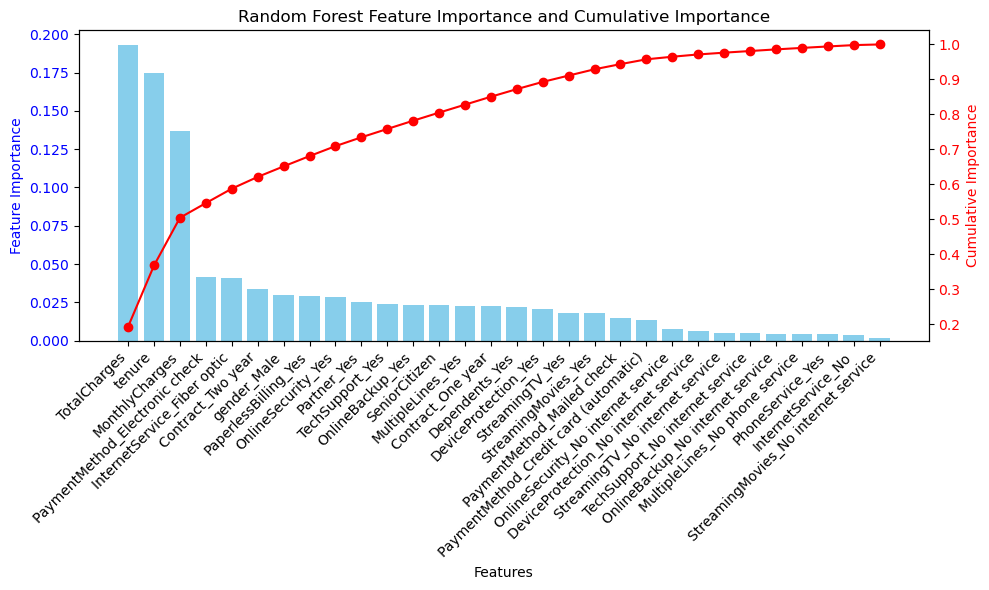

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for feature importance
ax1.bar(df_rf_feat_impt['Feature'], df_rf_feat_impt['Importance'], color='skyblue')
ax1.set_xlabel('Features')
ax1.set_ylabel('Feature Importance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(df_rf_feat_impt['Feature'], rotation=45, ha='right')

# Line chart for cumulative importance
ax2 = ax1.twinx()
ax2.plot(df_rf_feat_impt['Feature'], df_rf_feat_impt['Cumulative Importance'], color='red', marker='o')
ax2.set_ylabel('Cumulative Importance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Random Forest Feature Importance and Cumulative Importance')
plt.tight_layout()
plt.show()


Feature importance scores from the baseline Random Forest model were analysed to understand the relative contribution of each feature to churn prediction. From the chart, it shows a high concentration of predictive power in a core group of features. The cumulative importance plot shows that about ()% of the model's total gain is derived from the top 3 features, TotalCharges, tenure, and MonthlyCharges while the remaining features contributes marginally.

To optimise the model for deployment, a Reduced Feature Set was created. This is done by filtering out the bottom 10% of cumulative importance. This approach minimises model complexity and mitigates the risk of the model learning from noise in less significant variables without sacrificing performance.

### Random Forest (feature engineering)

In [33]:
top_features = df_rf_feat_impt.head(20)['Feature'] ## Select top 20 features

X_train_fs = X_train[top_features]
X_test_fs = X_test[top_features]

rf_fs = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_fs.fit(X_train_fs, y_train)

y_pred_fs = rf_fs.predict(X_test_fs)
accuracy_rf_fs = accuracy_score(y_test, y_pred_fs)

comparison_level2 = pd.DataFrame({
    "Model": [
        "Baseline Random Forest (All Features)",
        "Random Forest (After Feature Selection)"
    ],
    "Accuracy": [
        accuracy_rf,
        accuracy_rf_fs
    ]
})

comparison_level2


,Model,Accuracy
0,Baseline Random Forest (All Features),0.794132
1,Random Forest (After Feature Selection),0.785613


### Random Forest Feature Engineering Evaluation/Comparison
The Random Forest model was retrained using the top 20 most influential features, using feature importance-based selection.

The Random Forest after feature selection achieved an accuracy of about 0.78, compared to 0.79 when using all features.

Although the feature-selected model shows a slight reduction in accuracy, the difference is minimal. This suggests that many removed features contributed limited additional predictive value.

The reduced feature set helps simplify the model with comparable performance. This may improve interpretability and generalisation by reducing noise and the risk of overfitting.

## Final Model Selection
After comparing all four models across three levels of evaluation, the tuned Random Forest model was selected as the final model due to its superior predictive performance and robustness.

At the first level of comparison, Random Forest performed better than Logistic Regression, improving accuracy from approximately 0.78 to 0.79. This indicates the presence of non-linear relationships in customer churn behaviour that are not well captured by linear models.

At the second level, a simpler model was achieved with feature selection, with comparable performance. This suggests that many features contribute limited additional predictive value.  This improved model simplicity but did not lead to a significant accuracy improvement. This makes it the most suitable choice for identifying customers at risk of churn.

At the third level, hyperparameter tuning further refined the Random Forrest model by controlling tree depth, split criteria, and ensemble size. The tuned Random Forest achieved a higher accuracy than the baseline Random Forest. This shows improved generalisation and more effective pattern capture.

From a business perspective, being able to accurately identify customers at risk of churn is critical. The improved predictive performance of the tuned Random Forest enables the company to proactively identify customers at risk of churn and supports targeted retention strategies potentially reducing revenue loss.


## Confusion Matrix and Classification Report for base Random Forest

In [34]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[1409,  143],
       [ 292,  269]])

The confusion matrix provides insight into the types of prediction errors. Specifically, false negatives, which are critical in churn prediction, as missed churners represent potential revenue loss.

The confusion matrix shows that the model correctly predicted 1409 customers who did not churn (true negatives) and correctly identified 269 customers who did churn (true positives).
However, 143 non-churned customers were incorrectly predicted as churn (false positives), and 292 churned customers were incorrectly predicted as non-churn (false negatives).

The relatively high number of false negatives indicates that some customers who eventually churned were not detected by the model.

In [35]:
## Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



To better understand the model's performance for churned customers, precision and recall metrics were analysed. Recall is especially important for retention strategies.

For non-churned customers, class 0. The model performs well with a high precision of 0.83 and a recall of 0.91. This indicates the model has a strong ability to identify customers who remain with the service correctly.

For churned customers, class 1. The model attains a moderate precision of 0.65 and a lower recall of 0.48. This suggests that the model fails to identify a significant portion of actual churned customers while predicting churn cases reasonably accurately.

The overall accuracy of 0.79 suggests that the model correctly predicts churn status for about 79% of customers. However, accuracy alone may be misleading due to the class imbalance in the dataset.

The macro average treats both classes equally and shows a lower recall for the churn class. This shows the model's weakness in detecting churned customers.

The weighted average shows the class imbalance and is dominated by the performance on the non-churn class. This results in higher overall scores.

The confusion matrix and classification report provide insight into the model’s performance beyond overall accuracy. The Random Forest model shows a stronger performance in predicting non-churn customers, with relatively lower recall for churn cases.

This suggests that the model is effective overall. However, further optimisation or cost-sensitive learning could improve the detection of churned customers.


In [36]:
## New data

## Predict


## Iterative model development


In [37]:
## Further feature engineering / feature selection